# This file calculates MNAD for different testing instances

In [1]:
# Testing IEEE Model with dense layers only
# testing with deltas only
# SM models
# tesing LSTM 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import optimizers, models, regularizers
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses, Input
from tensorflow.keras.layers import Input, Dense, LSTM, Lambda, Dropout, GRU,SimpleRNN
from tensorflow.keras.layers import Flatten, Dense,Dropout
from tensorflow.keras.models import load_model, Sequential, Model
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from numpy.linalg import norm
from scipy import stats

(5000, 236)
(4900, 236)


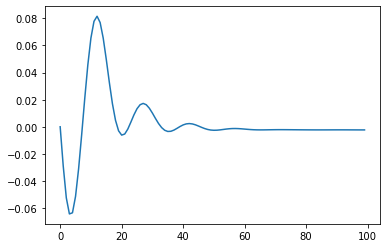

In [2]:
def outliers(df, int):
  z_scores = stats.zscore(df)
  abs_z_scores = np.abs(z_scores)
  filtered_entries = (abs_z_scores < int).all(axis=1)
  df = df[filtered_entries]
  return df
def coeff_determination(y_pred, y_true): #Order of function inputs is important here        
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

# importing data 
import scipy.io as sio
train= sio.loadmat('Best_TRAIN_SMIEEE118.mat')   # load the desired model
snapshots_train=train['xFOM_train']
test= sio.loadmat('Best_TEST_SMIEEE118.mat')   # load the desired model
snapshots_all=test['xFOM_test']
tspan=100
snapshots_train=snapshots_train[:,:]
snapshots_valid=snapshots_all[0:tspan,:]
snapshots_train=outliers(snapshots_train,8) 
print (snapshots_train.shape)
print (snapshots_all.shape)
plt.plot(snapshots_train[0:tspan,1])
plt.show()


In [3]:
latent_dim=4
input=output=snapshots_train.shape[1]
first=input
#second=64
#third=0
# Autoencoder
encoder_input = Input(shape=(input, 1), name='IEEE118')
o1 = Flatten()(encoder_input)
o2 = Dense(first, activation="selu")(o1)
#o3 = Dense(second, activation="selu")(o2)
#o4 = Dense(third, activation="selu")(o3)

#x4 = Dense(40, activation=sinc)(x1)
#d1=Dropout(0.4)(x2)
#x5= Dense(30,activation='selu')(x1)
#d2=Dropout(0.4)(x3)
#x6=Dense(20,activation=sinc)(x5)
#x7 = Dense(10, activation=sinc)(x6)
#x5=Dense(20,activation='tanh')(x4)
encoder_output = Dense(latent_dim, activation=None)(o2)
encoder = Model(encoder_input, encoder_output, name='encoder')
#encoder.summary()
decoder_input = Dense(latent_dim, activation='selu')(encoder_output)
#x6=Dense(20, activation="tanh")(decoder_input)
#x = Dense(2000, activation='selu')(decoder_input)
#x5 = Dense(third, activation='selu')(decoder_input)


#decoder_input1 = Dense(third, activation='selu')(decoder_input)
#decoder_input2 = Dense(second, activation='selu')(decoder_input)
decoder_input3= Dense(first, activation='selu')(decoder_input)


#x12 = Dense(70, activation="selu")(x11)
#d1=Dropout(0.4)(x2)
#x13= Dense(80,activation='selu')(x12)
#d2=Dropout(0.4)(x3)
#x14=Dense(90,activation='selu')(x13)
#x15= Dense(100, activation="selu")(x14)
decoder_output = Dense(output, activation=None)(decoder_input3)
decoder = Model(decoder_input, decoder_output, name='decoder')
#decoder.summary()
# defining autoencoder
ae_output=decoder(encoder(encoder_input))
autoencoder = Model(encoder_input, ae_output, name='autoencoder')
autoencoder.summary()
weights_filepath = 'best_weights118_ae.h5'

# design network
lrate = 0.001
my_adam = optimizers.Adam(lr=lrate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

checkpoint = ModelCheckpoint(weights_filepath, monitor='loss', verbose=1, save_best_only=True, mode='min',save_weights_only=True)
earlystopping = EarlyStopping(monitor='loss', min_delta=0, patience=10, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
callbacks_list = [checkpoint]
epoch_num=500
batch_size=50
autoencoder.compile(optimizer=my_adam, loss='MeanSquaredError',metrics=[coeff_determination,'accuracy'])
#autoencoder.fit(snapshots_train, snapshots_train,
 #               epochs=epoch_num,  batch_size=batch_size,
  #                        callbacks=callbacks_list
   #             ,validation_data=(snapshots_valid, snapshots_valid))
               # shuffle=True)
#autoencoder.load_weights(weights_filepath)
#encoded_test = K.eval(encoder(snapshots_test.astype('float32')))
#autoencoder_output = autoencoder.predict(snapshots_test)

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 IEEE118 (InputLayer)        [(None, 236, 1)]          0         
                                                                 
 encoder (Functional)        (None, 4)                 56880     
                                                                 
 decoder (Functional)        (None, 236)               57112     
                                                                 
Total params: 113,992
Trainable params: 113,992
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


100/100 [==============================] - ETA: 0s - loss: 0.0197 - coeff_determination: -0.0060 - accuracy: 0.6710
Epoch 1: loss improved from inf to 0.01974, saving model to best_weights118_ae.h5
100/100 [==============================] - 2s 9ms/step - loss: 0.0197 - coeff_determination: -0.0060 - accuracy: 0.6710 - val_loss: 0.0045 - val_coeff_determination: 0.9302 - val_accuracy: 0.8700
Epoch 2/500
 93/100 [==========================>...] - ETA: 0s - loss: 0.0028 - coeff_determination: 0.9712 - accuracy: 0.8877
Epoch 2: loss improved from 0.01974 to 0.00271, saving model to best_weights118_ae.h5
100/100 [==============================] - 1s 5ms/step - loss: 0.0027 - coeff_determination: 0.9716 - accuracy: 0.8880 - val_loss: 0.0022 - val_coeff_determination: 0.9760 - val_accuracy: 0.8300
Epoch 3/500
 99/100 [============================>.] - ETA: 0s - loss: 0.0020 - coeff_determination: 0.9790 - accuracy: 0.8913
Epoch 3: loss improved from 0.00271 to 0.00200, saving model to best_we

Epoch 42/500
 95/100 [===========================>..] - ETA: 0s - loss: 1.3700e-04 - coeff_determination: 0.9986 - accuracy: 0.9823
Epoch 42: loss did not improve from 0.00013
100/100 [==============================] - 0s 5ms/step - loss: 1.3770e-04 - coeff_determination: 0.9986 - accuracy: 0.9816 - val_loss: 2.2894e-04 - val_coeff_determination: 0.9976 - val_accuracy: 0.9900
Epoch 43/500
 97/100 [============================>.] - ETA: 0s - loss: 1.8649e-04 - coeff_determination: 0.9981 - accuracy: 0.9798
Epoch 43: loss did not improve from 0.00013
100/100 [==============================] - 0s 5ms/step - loss: 1.8853e-04 - coeff_determination: 0.9981 - accuracy: 0.9802 - val_loss: 2.5018e-04 - val_coeff_determination: 0.9968 - val_accuracy: 0.9800
Epoch 44/500
 96/100 [===========================>..] - ETA: 0s - loss: 3.5807e-04 - coeff_determination: 0.9964 - accuracy: 0.9756
Epoch 44: loss did not improve from 0.00013
100/100 [==============================] - 1s 6ms/step - loss: 3.5

 90/100 [==========================>...] - ETA: 0s - loss: 1.2601e-04 - coeff_determination: 0.9987 - accuracy: 0.9869
Epoch 84: loss did not improve from 0.00006
100/100 [==============================] - 1s 5ms/step - loss: 1.3080e-04 - coeff_determination: 0.9987 - accuracy: 0.9864 - val_loss: 1.5295e-04 - val_coeff_determination: 0.9981 - val_accuracy: 0.9900
Epoch 85/500
100/100 [==============================] - ETA: 0s - loss: 8.1294e-05 - coeff_determination: 0.9992 - accuracy: 0.9860
Epoch 85: loss did not improve from 0.00006
100/100 [==============================] - 1s 5ms/step - loss: 8.1294e-05 - coeff_determination: 0.9992 - accuracy: 0.9860 - val_loss: 8.7343e-05 - val_coeff_determination: 0.9990 - val_accuracy: 0.9900
Epoch 86/500
 95/100 [===========================>..] - ETA: 0s - loss: 6.0197e-05 - coeff_determination: 0.9994 - accuracy: 0.9867
Epoch 86: loss improved from 0.00006 to 0.00006, saving model to best_weights118_ae.h5
100/100 [===========================

 98/100 [============================>.] - ETA: 0s - loss: 6.5216e-05 - coeff_determination: 0.9993 - accuracy: 0.9869
Epoch 126: loss did not improve from 0.00004
100/100 [==============================] - 0s 5ms/step - loss: 6.5018e-05 - coeff_determination: 0.9993 - accuracy: 0.9868 - val_loss: 5.6889e-05 - val_coeff_determination: 0.9993 - val_accuracy: 0.9800
Epoch 127/500
 93/100 [==========================>...] - ETA: 0s - loss: 5.3247e-05 - coeff_determination: 0.9994 - accuracy: 0.9867
Epoch 127: loss did not improve from 0.00004
100/100 [==============================] - 0s 5ms/step - loss: 5.3151e-05 - coeff_determination: 0.9994 - accuracy: 0.9868 - val_loss: 5.9546e-05 - val_coeff_determination: 0.9993 - val_accuracy: 0.9800
Epoch 128/500
 91/100 [==========================>...] - ETA: 0s - loss: 4.4549e-05 - coeff_determination: 0.9995 - accuracy: 0.9875
Epoch 128: loss did not improve from 0.00004
100/100 [==============================] - 0s 5ms/step - loss: 4.5386e-05 

 97/100 [============================>.] - ETA: 0s - loss: 3.7400e-05 - coeff_determination: 0.9996 - accuracy: 0.9868
Epoch 168: loss did not improve from 0.00003
100/100 [==============================] - 0s 5ms/step - loss: 3.7245e-05 - coeff_determination: 0.9996 - accuracy: 0.9868 - val_loss: 4.8518e-05 - val_coeff_determination: 0.9994 - val_accuracy: 0.9800
Epoch 169/500
100/100 [==============================] - ETA: 0s - loss: 3.4353e-05 - coeff_determination: 0.9996 - accuracy: 0.9868
Epoch 169: loss did not improve from 0.00003
100/100 [==============================] - 1s 6ms/step - loss: 3.4353e-05 - coeff_determination: 0.9996 - accuracy: 0.9868 - val_loss: 5.4493e-05 - val_coeff_determination: 0.9994 - val_accuracy: 0.9800
Epoch 170/500
 99/100 [============================>.] - ETA: 0s - loss: 3.7986e-05 - coeff_determination: 0.9996 - accuracy: 0.9873
Epoch 170: loss did not improve from 0.00003
100/100 [==============================] - 1s 7ms/step - loss: 3.8083e-05 

100/100 [==============================] - 0s 5ms/step - loss: 3.5824e-05 - coeff_determination: 0.9996 - accuracy: 0.9864 - val_loss: 5.3680e-05 - val_coeff_determination: 0.9994 - val_accuracy: 0.9800
Epoch 190/500
 88/100 [=========================>....] - ETA: 0s - loss: 5.6891e-05 - coeff_determination: 0.9994 - accuracy: 0.9861
Epoch 190: loss did not improve from 0.00003
100/100 [==============================] - 0s 5ms/step - loss: 5.6216e-05 - coeff_determination: 0.9994 - accuracy: 0.9860 - val_loss: 5.7705e-05 - val_coeff_determination: 0.9993 - val_accuracy: 0.9800
Epoch 191/500
 95/100 [===========================>..] - ETA: 0s - loss: 5.5771e-05 - coeff_determination: 0.9994 - accuracy: 0.9876
Epoch 191: loss did not improve from 0.00003
100/100 [==============================] - 0s 5ms/step - loss: 5.8439e-05 - coeff_determination: 0.9994 - accuracy: 0.9868 - val_loss: 1.5386e-04 - val_coeff_determination: 0.9973 - val_accuracy: 0.9700
Epoch 192/500
 88/100 [============

Epoch 211/500
 90/100 [==========================>...] - ETA: 0s - loss: 3.7805e-05 - coeff_determination: 0.9996 - accuracy: 0.9876
Epoch 211: loss did not improve from 0.00003
100/100 [==============================] - 1s 5ms/step - loss: 3.6838e-05 - coeff_determination: 0.9996 - accuracy: 0.9876 - val_loss: 3.6631e-05 - val_coeff_determination: 0.9995 - val_accuracy: 0.9800
Epoch 212/500
 94/100 [===========================>..] - ETA: 0s - loss: 4.4221e-05 - coeff_determination: 0.9995 - accuracy: 0.9862
Epoch 212: loss did not improve from 0.00003
100/100 [==============================] - 1s 6ms/step - loss: 4.3862e-05 - coeff_determination: 0.9995 - accuracy: 0.9866 - val_loss: 4.3312e-05 - val_coeff_determination: 0.9995 - val_accuracy: 0.9800
Epoch 213/500
 94/100 [===========================>..] - ETA: 0s - loss: 1.1639e-04 - coeff_determination: 0.9988 - accuracy: 0.9855
Epoch 213: loss did not improve from 0.00003
100/100 [==============================] - 1s 6ms/step - los

100/100 [==============================] - 0s 5ms/step - loss: 4.3235e-05 - coeff_determination: 0.9996 - accuracy: 0.9868 - val_loss: 3.9778e-05 - val_coeff_determination: 0.9995 - val_accuracy: 0.9700
Epoch 233/500
 95/100 [===========================>..] - ETA: 0s - loss: 3.7987e-05 - coeff_determination: 0.9996 - accuracy: 0.9865
Epoch 233: loss did not improve from 0.00003
100/100 [==============================] - 0s 5ms/step - loss: 3.8466e-05 - coeff_determination: 0.9996 - accuracy: 0.9864 - val_loss: 4.9048e-05 - val_coeff_determination: 0.9994 - val_accuracy: 0.9800
Epoch 234/500
 96/100 [===========================>..] - ETA: 0s - loss: 3.8207e-05 - coeff_determination: 0.9996 - accuracy: 0.9867
Epoch 234: loss did not improve from 0.00003
100/100 [==============================] - 0s 5ms/step - loss: 3.7992e-05 - coeff_determination: 0.9996 - accuracy: 0.9866 - val_loss: 3.7284e-05 - val_coeff_determination: 0.9996 - val_accuracy: 0.9800
Epoch 235/500
 93/100 [============

Epoch 254/500
 97/100 [============================>.] - ETA: 0s - loss: 2.2606e-05 - coeff_determination: 0.9998 - accuracy: 0.9878
Epoch 254: loss improved from 0.00002 to 0.00002, saving model to best_weights118_ae.h5
100/100 [==============================] - 1s 6ms/step - loss: 2.2586e-05 - coeff_determination: 0.9998 - accuracy: 0.9874 - val_loss: 3.1339e-05 - val_coeff_determination: 0.9996 - val_accuracy: 0.9800
Epoch 255/500
 89/100 [=========================>....] - ETA: 0s - loss: 2.4545e-05 - coeff_determination: 0.9997 - accuracy: 0.9879
Epoch 255: loss did not improve from 0.00002
100/100 [==============================] - 1s 5ms/step - loss: 2.4767e-05 - coeff_determination: 0.9997 - accuracy: 0.9872 - val_loss: 4.1755e-05 - val_coeff_determination: 0.9995 - val_accuracy: 0.9800
Epoch 256/500
 96/100 [===========================>..] - ETA: 0s - loss: 2.5715e-05 - coeff_determination: 0.9997 - accuracy: 0.9879
Epoch 256: loss did not improve from 0.00002
100/100 [========

100/100 [==============================] - 1s 7ms/step - loss: 3.2804e-05 - coeff_determination: 0.9997 - accuracy: 0.9872 - val_loss: 3.3506e-05 - val_coeff_determination: 0.9996 - val_accuracy: 0.9900
Epoch 276/500
 92/100 [==========================>...] - ETA: 0s - loss: 3.1923e-05 - coeff_determination: 0.9997 - accuracy: 0.9878
Epoch 276: loss did not improve from 0.00002
100/100 [==============================] - 0s 5ms/step - loss: 3.2300e-05 - coeff_determination: 0.9997 - accuracy: 0.9874 - val_loss: 6.0812e-05 - val_coeff_determination: 0.9991 - val_accuracy: 0.9900
Epoch 277/500
 87/100 [=========================>....] - ETA: 0s - loss: 6.0113e-05 - coeff_determination: 0.9994 - accuracy: 0.9871
Epoch 277: loss did not improve from 0.00002
100/100 [==============================] - 1s 5ms/step - loss: 6.0504e-05 - coeff_determination: 0.9994 - accuracy: 0.9876 - val_loss: 6.3365e-05 - val_coeff_determination: 0.9992 - val_accuracy: 0.9800
Epoch 278/500
 91/100 [============

Epoch 297/500
 93/100 [==========================>...] - ETA: 0s - loss: 2.2917e-05 - coeff_determination: 0.9998 - accuracy: 0.9858
Epoch 297: loss did not improve from 0.00002
100/100 [==============================] - 1s 6ms/step - loss: 2.3238e-05 - coeff_determination: 0.9998 - accuracy: 0.9866 - val_loss: 3.0476e-05 - val_coeff_determination: 0.9996 - val_accuracy: 0.9900
Epoch 298/500
 93/100 [==========================>...] - ETA: 0s - loss: 2.6139e-05 - coeff_determination: 0.9997 - accuracy: 0.9875
Epoch 298: loss did not improve from 0.00002
100/100 [==============================] - 1s 6ms/step - loss: 2.7008e-05 - coeff_determination: 0.9997 - accuracy: 0.9874 - val_loss: 7.3370e-05 - val_coeff_determination: 0.9992 - val_accuracy: 0.9900
Epoch 299/500
 91/100 [==========================>...] - ETA: 0s - loss: 2.8154e-04 - coeff_determination: 0.9972 - accuracy: 0.9824
Epoch 299: loss did not improve from 0.00002
100/100 [==============================] - 1s 6ms/step - los

100/100 [==============================] - 1s 6ms/step - loss: 2.2246e-05 - coeff_determination: 0.9998 - accuracy: 0.9862 - val_loss: 2.8142e-05 - val_coeff_determination: 0.9996 - val_accuracy: 0.9800
Epoch 319/500
 92/100 [==========================>...] - ETA: 0s - loss: 2.3820e-05 - coeff_determination: 0.9997 - accuracy: 0.9865
Epoch 319: loss did not improve from 0.00002
100/100 [==============================] - 1s 5ms/step - loss: 2.3673e-05 - coeff_determination: 0.9998 - accuracy: 0.9868 - val_loss: 3.1947e-05 - val_coeff_determination: 0.9995 - val_accuracy: 0.9900
Epoch 320/500
100/100 [==============================] - ETA: 0s - loss: 2.1411e-05 - coeff_determination: 0.9998 - accuracy: 0.9870
Epoch 320: loss did not improve from 0.00002
100/100 [==============================] - 1s 6ms/step - loss: 2.1411e-05 - coeff_determination: 0.9998 - accuracy: 0.9870 - val_loss: 2.5159e-05 - val_coeff_determination: 0.9997 - val_accuracy: 0.9800
Epoch 321/500
 92/100 [============

Epoch 340/500
 94/100 [===========================>..] - ETA: 0s - loss: 9.1724e-05 - coeff_determination: 0.9991 - accuracy: 0.9843
Epoch 340: loss did not improve from 0.00002
100/100 [==============================] - 0s 5ms/step - loss: 8.8758e-05 - coeff_determination: 0.9991 - accuracy: 0.9846 - val_loss: 5.4200e-05 - val_coeff_determination: 0.9994 - val_accuracy: 0.9900
Epoch 341/500
 93/100 [==========================>...] - ETA: 0s - loss: 7.4007e-05 - coeff_determination: 0.9993 - accuracy: 0.9845
Epoch 341: loss did not improve from 0.00002
100/100 [==============================] - 0s 5ms/step - loss: 7.0932e-05 - coeff_determination: 0.9993 - accuracy: 0.9854 - val_loss: 4.1575e-05 - val_coeff_determination: 0.9995 - val_accuracy: 0.9800
Epoch 342/500
 93/100 [==========================>...] - ETA: 0s - loss: 2.1817e-05 - coeff_determination: 0.9998 - accuracy: 0.9867
Epoch 342: loss did not improve from 0.00002
100/100 [==============================] - 0s 5ms/step - los

Epoch 362/500
 97/100 [============================>.] - ETA: 0s - loss: 5.3207e-05 - coeff_determination: 0.9995 - accuracy: 0.9882
Epoch 362: loss did not improve from 0.00002
100/100 [==============================] - 0s 4ms/step - loss: 5.4128e-05 - coeff_determination: 0.9995 - accuracy: 0.9882 - val_loss: 9.0500e-05 - val_coeff_determination: 0.9987 - val_accuracy: 0.9800
Epoch 363/500
 91/100 [==========================>...] - ETA: 0s - loss: 3.4697e-05 - coeff_determination: 0.9996 - accuracy: 0.9864
Epoch 363: loss did not improve from 0.00002
100/100 [==============================] - 0s 4ms/step - loss: 3.4992e-05 - coeff_determination: 0.9996 - accuracy: 0.9868 - val_loss: 7.9848e-05 - val_coeff_determination: 0.9988 - val_accuracy: 0.9900
Epoch 364/500
 99/100 [============================>.] - ETA: 0s - loss: 3.4909e-05 - coeff_determination: 0.9996 - accuracy: 0.9873
Epoch 364: loss did not improve from 0.00002
100/100 [==============================] - 0s 5ms/step - los

100/100 [==============================] - 1s 6ms/step - loss: 1.6647e-05 - coeff_determination: 0.9998 - accuracy: 0.9884 - val_loss: 2.2498e-05 - val_coeff_determination: 0.9997 - val_accuracy: 0.9900
Epoch 384/500
 93/100 [==========================>...] - ETA: 0s - loss: 1.6377e-05 - coeff_determination: 0.9998 - accuracy: 0.9884
Epoch 384: loss improved from 0.00002 to 0.00002, saving model to best_weights118_ae.h5
100/100 [==============================] - 1s 6ms/step - loss: 1.6338e-05 - coeff_determination: 0.9998 - accuracy: 0.9884 - val_loss: 2.2861e-05 - val_coeff_determination: 0.9997 - val_accuracy: 0.9900
Epoch 385/500
 97/100 [============================>.] - ETA: 0s - loss: 1.7205e-05 - coeff_determination: 0.9998 - accuracy: 0.9882
Epoch 385: loss did not improve from 0.00002
100/100 [==============================] - 1s 6ms/step - loss: 1.7164e-05 - coeff_determination: 0.9998 - accuracy: 0.9884 - val_loss: 2.2106e-05 - val_coeff_determination: 0.9997 - val_accuracy:

Epoch 405/500
 96/100 [===========================>..] - ETA: 0s - loss: 1.7268e-05 - coeff_determination: 0.9998 - accuracy: 0.9877
Epoch 405: loss did not improve from 0.00002
100/100 [==============================] - 1s 6ms/step - loss: 1.7183e-05 - coeff_determination: 0.9998 - accuracy: 0.9882 - val_loss: 2.4105e-05 - val_coeff_determination: 0.9997 - val_accuracy: 0.9900
Epoch 406/500
 97/100 [============================>.] - ETA: 0s - loss: 1.6162e-05 - coeff_determination: 0.9998 - accuracy: 0.9882
Epoch 406: loss improved from 0.00002 to 0.00002, saving model to best_weights118_ae.h5
100/100 [==============================] - 1s 6ms/step - loss: 1.6177e-05 - coeff_determination: 0.9998 - accuracy: 0.9884 - val_loss: 2.2994e-05 - val_coeff_determination: 0.9997 - val_accuracy: 0.9900
Epoch 407/500
 94/100 [===========================>..] - ETA: 0s - loss: 1.4404e-05 - coeff_determination: 0.9998 - accuracy: 0.9881
Epoch 407: loss improved from 0.00002 to 0.00001, saving model

Epoch 448/500
 91/100 [==========================>...] - ETA: 0s - loss: 1.4970e-05 - coeff_determination: 0.9998 - accuracy: 0.9890
Epoch 448: loss did not improve from 0.00001
100/100 [==============================] - 1s 6ms/step - loss: 1.5158e-05 - coeff_determination: 0.9998 - accuracy: 0.9888 - val_loss: 2.0443e-05 - val_coeff_determination: 0.9997 - val_accuracy: 0.9900
Epoch 449/500
 95/100 [===========================>..] - ETA: 0s - loss: 1.6679e-05 - coeff_determination: 0.9998 - accuracy: 0.9886
Epoch 449: loss did not improve from 0.00001
100/100 [==============================] - 1s 5ms/step - loss: 1.6521e-05 - coeff_determination: 0.9998 - accuracy: 0.9890 - val_loss: 1.8014e-05 - val_coeff_determination: 0.9997 - val_accuracy: 0.9900
Epoch 450/500
 97/100 [============================>.] - ETA: 0s - loss: 1.4630e-05 - coeff_determination: 0.9998 - accuracy: 0.9887
Epoch 450: loss did not improve from 0.00001
100/100 [==============================] - 1s 5ms/step - los

Epoch 491/500
 97/100 [============================>.] - ETA: 0s - loss: 2.4083e-05 - coeff_determination: 0.9998 - accuracy: 0.9891
Epoch 491: loss did not improve from 0.00001
100/100 [==============================] - 1s 5ms/step - loss: 2.3970e-05 - coeff_determination: 0.9998 - accuracy: 0.9892 - val_loss: 1.7730e-05 - val_coeff_determination: 0.9998 - val_accuracy: 0.9900
Epoch 492/500
100/100 [==============================] - ETA: 0s - loss: 3.4563e-05 - coeff_determination: 0.9996 - accuracy: 0.9886
Epoch 492: loss did not improve from 0.00001
100/100 [==============================] - 0s 5ms/step - loss: 3.4563e-05 - coeff_determination: 0.9996 - accuracy: 0.9886 - val_loss: 3.1046e-05 - val_coeff_determination: 0.9996 - val_accuracy: 0.9900
Epoch 493/500
 96/100 [===========================>..] - ETA: 0s - loss: 1.7594e-04 - coeff_determination: 0.9982 - accuracy: 0.9840
Epoch 493: loss did not improve from 0.00001
100/100 [==============================] - 1s 5ms/step - los

In [5]:
# generate encoded data for lstm
rnum_vals_train=50 # batch size
num_time_steps=tspan
#rnum_vals_test=300
#from sklearn.preprocessing import MinMaxScaler,normalize
# Train
encoded_train = K.eval(encoder(snapshots_train.astype('float32')))
encoded_train=outliers(encoded_train,10)
#endcoded_train=normalize(encoded_train)
# Reshape
lstm_training_data = encoded_train.reshape(rnum_vals_train,num_time_steps,latent_dim)
num_train_snapshots=rnum_vals_train
time_window=6 #try
total_size = np.shape(lstm_training_data)[0]*np.shape(lstm_training_data)[1] # 45*600=27000
total_size_sim = np.shape(lstm_training_data)[1]                             # 600
input_seq = np.zeros(shape=(total_size-num_train_snapshots*time_window
                           ,time_window,latent_dim))
output_seq = np.zeros(shape=(total_size-num_train_snapshots*time_window,latent_dim))
# Setting up inputs
sample = 0
for snum in range(num_train_snapshots):
    for t in range(time_window,total_size_sim):
        input_seq[sample,:,:] = lstm_training_data[snum,t-time_window:t,:]
        output_seq[sample,:] = lstm_training_data[snum,t,0:latent_dim]
        sample = sample + 1

In [6]:
# generate validation data for lstm
rnum_vals_train=1 # batch size
num_time_steps=tspan
num_train_snapshots=rnum_vals_train
#rnum_vals_test=300
#from sklearn.preprocessing import MinMaxScaler,normalize
# Train
#encoded_train = K.eval(encoder(snapshots_train.astype('float32')))
#encoded_train=outliers(encoded_train,10)
#endcoded_train=normalize(encoded_train)
# Reshape
encoded_valid=K.eval(encoder(snapshots_valid.astype('float32')))
lstm_training_data_valid = encoded_valid.reshape(rnum_vals_train,num_time_steps,latent_dim)
total_size_valid = np.shape(lstm_training_data_valid)[0]*np.shape(lstm_training_data_valid)[1] # 45*600=27000
total_size_sim_valid = np.shape(lstm_training_data_valid)[1]                             # 600
input_seq_valid = np.zeros(shape=(total_size_valid-num_train_snapshots*time_window
                           ,time_window,latent_dim))
output_seq_valid = np.zeros(shape=(total_size_valid-num_train_snapshots*time_window,latent_dim))
# Setting up inputs
sample = 0
for snum in range(num_train_snapshots):
    for t in range(time_window,total_size_sim_valid):
        input_seq_valid[sample,:,:] = lstm_training_data_valid[snum,t-time_window:t,:]
        output_seq_valid[sample,:] = lstm_training_data_valid[snum,t,0:latent_dim]
        sample = sample + 1

In [7]:
# Model architecture
units=40
lstm_model = models.Sequential()
lstm_model.add(LSTM(units,input_shape=(time_window, latent_dim),return_sequences=True))
#lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units,input_shape=(time_window, latent_dim),return_sequences=True))
#lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units,input_shape=(time_window, latent_dim),return_sequences=True))
#lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units,input_shape=(time_window, latent_dim),return_sequences=True))
#lstm_model.add(LSTM(units,return_sequences=True))
lstm_model.add(LSTM(units,return_sequences=False))
#lstm_model.add(Dropout(0.1))#try # 80 showing best response
#lstm_model.add(LSTM(units,return_sequences=False))
#lstm_model.add(Dropout(0.1))#
#lstm_model.add(LSTM(80,return_sequences=False))
#lstm_model.add(LSTM(40,input_shape=(time_window, latent_dim),return_sequences=False))
lstm_model.add(Dense(latent_dim, activation=None))

# design network
lstm_filepath = 'lstm_weights118.h5'
lstm_adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
checkpoint = ModelCheckpoint(lstm_filepath, monitor='loss', verbose=0, save_best_only=True, mode='min',save_weights_only=True)
earlystopping = EarlyStopping(monitor='loss', min_delta=0, patience=5, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
lstm_callbacks_list = [checkpoint]
# fit network
lstm_model.compile(optimizer=lstm_adam,loss='mean_squared_error')

lstm_model.summary()
#if mode == 'train':
# training parameters
batch_size_lstm=50 # try batch size=590
num_epochs = 500 # try
lstm_train_history = lstm_model.fit(input_seq,output_seq, epochs=num_epochs, 
                                    batch_size=batch_size_lstm, callbacks=lstm_callbacks_list   #,shuffle=True
                                  ,validation_data=[input_seq_valid,output_seq_valid] )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 6, 40)             7200      
                                                                 
 lstm_1 (LSTM)               (None, 6, 40)             12960     
                                                                 
 lstm_2 (LSTM)               (None, 6, 40)             12960     
                                                                 
 lstm_3 (LSTM)               (None, 6, 40)             12960     
                                                                 
 lstm_4 (LSTM)               (None, 40)                12960     
                                                                 
 dense_5 (Dense)             (None, 4)                 164       
                                                                 
Total params: 59,204
Trainable params: 59,204
Non-traina

94/94 [==============================] - 2s 22ms/step - loss: 7.9363e-04 - val_loss: 2.8323e-04
Epoch 67/500
94/94 [==============================] - 2s 20ms/step - loss: 1.6441e-04 - val_loss: 2.5813e-04
Epoch 68/500
94/94 [==============================] - 2s 23ms/step - loss: 1.3796e-04 - val_loss: 1.3982e-04
Epoch 69/500
94/94 [==============================] - 2s 24ms/step - loss: 1.3139e-04 - val_loss: 1.4657e-04
Epoch 70/500
94/94 [==============================] - 2s 23ms/step - loss: 1.5294e-04 - val_loss: 1.4419e-04
Epoch 71/500
94/94 [==============================] - 2s 21ms/step - loss: 1.8164e-04 - val_loss: 1.5135e-04
Epoch 72/500
94/94 [==============================] - 2s 22ms/step - loss: 1.5166e-04 - val_loss: 1.4063e-04
Epoch 73/500
94/94 [==============================] - 2s 25ms/step - loss: 1.7499e-04 - val_loss: 1.6354e-04
Epoch 74/500
94/94 [==============================] - 2s 24ms/step - loss: 1.4495e-04 - val_loss: 1.1980e-04
Epoch 75/500
94/94 [============

Epoch 141/500
94/94 [==============================] - 2s 23ms/step - loss: 8.3654e-05 - val_loss: 1.3324e-04
Epoch 142/500
94/94 [==============================] - 2s 24ms/step - loss: 1.2114e-04 - val_loss: 1.1157e-04
Epoch 143/500
94/94 [==============================] - 3s 27ms/step - loss: 1.3874e-04 - val_loss: 1.3114e-04
Epoch 144/500
94/94 [==============================] - 2s 24ms/step - loss: 1.7408e-04 - val_loss: 3.5052e-04
Epoch 145/500
94/94 [==============================] - 2s 23ms/step - loss: 2.6176e-04 - val_loss: 3.3298e-04
Epoch 146/500
94/94 [==============================] - 2s 18ms/step - loss: 3.0332e-04 - val_loss: 2.8109e-04
Epoch 147/500
94/94 [==============================] - 2s 17ms/step - loss: 2.7971e-04 - val_loss: 2.9811e-04
Epoch 148/500
94/94 [==============================] - 2s 18ms/step - loss: 1.6808e-04 - val_loss: 1.5644e-04
Epoch 149/500
94/94 [==============================] - 2s 17ms/step - loss: 0.0012 - val_loss: 0.0030
Epoch 150/500
94/9

94/94 [==============================] - 2s 25ms/step - loss: 6.3726e-05 - val_loss: 6.0149e-05
Epoch 290/500
94/94 [==============================] - 2s 24ms/step - loss: 6.0401e-05 - val_loss: 7.2216e-05
Epoch 291/500
94/94 [==============================] - 2s 22ms/step - loss: 1.2128e-04 - val_loss: 7.5462e-05
Epoch 292/500
94/94 [==============================] - 2s 23ms/step - loss: 7.9591e-05 - val_loss: 6.2486e-05
Epoch 293/500
94/94 [==============================] - 2s 25ms/step - loss: 5.0018e-05 - val_loss: 6.7590e-05
Epoch 294/500
94/94 [==============================] - 2s 23ms/step - loss: 4.3138e-05 - val_loss: 7.2154e-05
Epoch 295/500
94/94 [==============================] - 2s 23ms/step - loss: 1.3886e-04 - val_loss: 1.4167e-04
Epoch 296/500
94/94 [==============================] - 2s 23ms/step - loss: 1.9434e-04 - val_loss: 2.0066e-04
Epoch 297/500
94/94 [==============================] - 2s 21ms/step - loss: 2.4616e-04 - val_loss: 8.3371e-05
Epoch 298/500
94/94 [===

94/94 [==============================] - 2s 20ms/step - loss: 6.7863e-05 - val_loss: 4.8099e-05
Epoch 438/500
94/94 [==============================] - 2s 17ms/step - loss: 4.7093e-05 - val_loss: 4.4381e-05
Epoch 439/500
94/94 [==============================] - 2s 20ms/step - loss: 3.0203e-05 - val_loss: 2.4825e-05
Epoch 440/500
94/94 [==============================] - 2s 23ms/step - loss: 4.4797e-05 - val_loss: 1.4811e-04
Epoch 441/500
94/94 [==============================] - 2s 23ms/step - loss: 5.3242e-05 - val_loss: 7.9422e-05
Epoch 442/500
94/94 [==============================] - 2s 23ms/step - loss: 5.5740e-05 - val_loss: 4.3083e-05
Epoch 443/500
94/94 [==============================] - 2s 20ms/step - loss: 6.0347e-05 - val_loss: 1.0708e-04
Epoch 444/500
94/94 [==============================] - 2s 17ms/step - loss: 1.1313e-04 - val_loss: 2.8361e-04
Epoch 445/500
94/94 [==============================] - 2s 17ms/step - loss: 2.8308e-04 - val_loss: 2.1055e-04
Epoch 446/500
94/94 [===

# Testing

In [8]:
# Calculating MNADs
def MNAD(y_true,y_pred):
    Nx=y_true.shape[1] #columns=dims
    Nt=y_true.shape[0] # rows = time
    F=np.zeros(shape=(Nt,Nx))
    for i in range(Nx):
         F[:,i]=abs(y_true[:,i]-y_pred[:,i])/ (max(y_true[:,i])- min(y_true[:,i]))
    NAD=F.mean(axis=1)        
    return NAD.mean()
#print(MNAD(snapshots_test,decoded_lstm))  

In [9]:
# Calculation of Decoded values and MNADs
loop=int(snapshots_all.shape[0]/tspan)#49
d=int(snapshots_train.shape[1]/2) # no of dimensions (features)
rnum_vals_test=1
num_time_steps=tspan
lstm_model.load_weights(lstm_filepath)
#rnum_vals_test=300
#time_window=4
#Norm_delta=np.zeros(shape=(1,loop-1))
#Norm_omega=np.zeros(shape=(1,loop-1))
MNAD_delta=np.zeros(shape=(1,loop-1))
MNAD_omega=np.zeros(shape=(1,loop-1))
for i in range(1,loop):
    print('Running testing for i =', i, ' of ', loop)
    snapshots_test=snapshots_all[(i)*tspan:i*tspan+tspan,:]
    encoded_test = K.eval(encoder(snapshots_test.astype('float32')))    
    # data for testing LSTM
    num_test_snapshots=rnum_vals_test
    lstm_testing_data = encoded_test.reshape(rnum_vals_test,num_time_steps,latent_dim)
    #scaler = MinMaxScaler()
    #stm_testing_data[0,:,:]=scaler.fit_transform(lstm_testing_data[0,:,:])
    total_size = np.shape(lstm_testing_data)[0]*np.shape(lstm_testing_data)[1]
    total_size_sim = np.shape(lstm_testing_data)[1]
    # Shape the inputs and outputs
    input_seq = np.zeros(shape=(1,time_window,latent_dim))
    output_seq = np.zeros(shape=(total_size-num_test_snapshots*time_window,latent_dim))
    output_seq_pred = np.zeros(shape=(total_size-num_test_snapshots*time_window,latent_dim))
    #lstm_model.load_weights(lstm_filepath)
    # Setting up inputs
    sample = 0
    print('Running LSTM...')
    for snum in range(num_test_snapshots):
        input_seq[0,:,:] = lstm_testing_data[snum,0:time_window,:]
        for t in range(time_window,total_size_sim):
            #input_seq[0,:,:] = lstm_testing_data[snum,t-time_window:t,:]
            output_seq_pred[sample,:] = lstm_model.predict(input_seq[0:latent_dim,:,:])[0,:]   # [0,:]
            output_seq[sample,:] = lstm_testing_data[snum,t,0:latent_dim]
            input_seq[0,0:time_window-1,:] = input_seq[0,1:,:] 
            input_seq[0,time_window-1,:latent_dim] = output_seq_pred[sample,:]
            sample = sample + 1
    output_seq_pred = np.concatenate((encoded_test[0:6,:],output_seq_pred),axis=0)
    decoded_lstm= K.eval(decoder(output_seq_pred.astype('float32')))
    #Norm_delta[:,:]=norm(snapshots_test[:,:d]-decoded_lstm[:,:d])/norm(snapshots_test[:,:d])
   # Norm_omega[:,:]=norm(snapshots_test[:,d:]-decoded_lstm[:,d:])/norm(snapshots_test[:,d:])
    MNAD_delta[:,i-1]=MNAD(snapshots_test[:,:d],decoded_lstm[:,:d])
    MNAD_omega[:,i-1]=MNAD(snapshots_test[:,d:],decoded_lstm[:,d:])                   
    

Running testing for i = 1  of  49
Running LSTM...
Running testing for i = 2  of  49
Running LSTM...
Running testing for i = 3  of  49
Running LSTM...
Running testing for i = 4  of  49
Running LSTM...
Running testing for i = 5  of  49
Running LSTM...
Running testing for i = 6  of  49
Running LSTM...
Running testing for i = 7  of  49
Running LSTM...
Running testing for i = 8  of  49
Running LSTM...
Running testing for i = 9  of  49
Running LSTM...
Running testing for i = 10  of  49
Running LSTM...
Running testing for i = 11  of  49
Running LSTM...
Running testing for i = 12  of  49
Running LSTM...
Running testing for i = 13  of  49
Running LSTM...
Running testing for i = 14  of  49
Running LSTM...
Running testing for i = 15  of  49
Running LSTM...
Running testing for i = 16  of  49
Running LSTM...
Running testing for i = 17  of  49
Running LSTM...
Running testing for i = 18  of  49
Running LSTM...
Running testing for i = 19  of  49
Running LSTM...
Running testing for i = 20  of  49
Runni

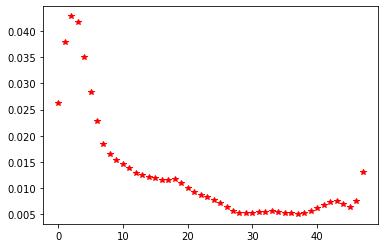

In [11]:
plt.plot(MNAD_delta.T,'r*')
#plt.plot(MNAD_omega.T,'k*')
plt.title('MNAD error of deltas for range of data sets')
plt.savefig('Results/MNAD_delta')

In [ ]:
plt.plot(MNAD_omega.T,'r*')
plt.title('MNAD error of omegas for range of data sets')
plt.savefig('Results/MNAD_omega')